<a href="https://colab.research.google.com/github/aluuduarte/DataScienceProjects/blob/main/Examen_Mod3_DUARTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1

Observe el siguiente gráfico hecho a partir del dataset Titanic y responda:
- ¿Qué se pretende mostrar?
**Se pretente mostrar la cantidad de pasajes vendidos en cada ciudad de embarque.**
- ¿Qué errores cometió el que creó esta visualización?, ¿Cómo los corregirían?

**Los errores cometidos son:**
1. Los límites del gráfico, podría hacerse un ylim hasta 700, para que no quede tanto espacio arriba. Ademas, ajustar los ticks del eje Y para usar múltiplos más comunes (ej., de 50 en 50: 0, 50, 100, 150, 200, ..., 700).
2. No tiene título. Hay que agregarlo.
3. La etiqueta del eje X es "Ciudad de embarque", pero debajo de las categorías se añade la etiqueta "Ciudades". Esto es redundante y confunde. Eliminaría las etiquetas y solo dejaría la leyenda de arriba que ya muestra con colores cada Ciudad, dejando solo "Ciudad de embarque" sobre el eje X.
4. La etiqueta del eje Y en vez de números de pasajes, debería ser "Cantidad de pasajes" o "Pasajes vendidos".
5. Error más crítico. El gráfico no incluye los valores numéricos exactos sobre o dentro de cada barra (el conteo de pasajeros). Esto obliga al lector a estimar el valor exacto proyectando la barra hacia el eje Y, lo cual es ineficiente y propenso a errores. Habría que incluir el conteo exacto de pasajeros sobre cada barra (ej., Southampton: 644, Cherbourg: 168, Queenstown: 77). Esto elimina la necesidad de consultar el eje Y para obtener los valores.

# Ejercicio 2
Se quiere evaluar la calidad del espacio verde en cada comuna de la capital federal. Para ello
se tomará como base el dataset de arbolado.
- En primer lugar pensá una variable pueda representar la calidad del espacio verde y sirva para comparar las diferentes comunas. Justificá.
--
**La variable es: "densidad_arboles_km2"** Si solo contamos el Número Total de Árboles, las comunas más grandes (como la Comuna 8 o la 4) siempre aparecerán como las de "mejor calidad" simplemente por su área.
Al dividir la cantidad de árboles por el área (en $\text{km}^2$), estamos normalizando el dato. Esto permite una comparación justa e indica qué tan bien está saturada una comuna con árboles respecto a su tamaño.
- En segundo lugar mostrala mediante un mapa coroplético de las comunas. En caso que consideres otro tipo de gráfico para hacer esta vizualización hacelo y justifica. Para este ejercicio puede usar herramientas de IA para resolver el mapa coroplético con absoluta
libertad.
--

/usr/local/lib/python3.12/dist-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Prueba de mapa


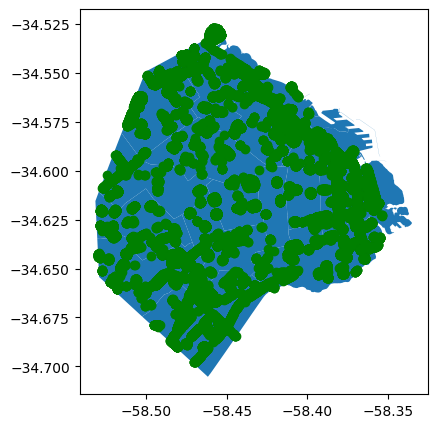

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

# Leer el archivo de comunas de CABA, lo descargamos en la guía del Modulo3-Clase5/6
comunas_gdf = gpd.read_file('/content/comunas_wgs84.shp')

# Leer el archivo de arbolado en espacios verdes "arbolado-en-espacios-verdes.csv",
arboles = pd.read_csv('/content/arbolado-en-espacios-verdes.csv')

# Este tiene la ubicación de cada árbol en latitud y longitud, que debo convertir
# a una columna de "geometry" para luego transofrmar el dataset a un GeoDataFrame y
# poder plotearlo sobre las comunas.
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(arboles["long"], arboles["lat"])]
arboles_gdf = gpd.GeoDataFrame(arboles, crs = crs, geometry = geometry)

#-- ESTE NO ES EL MAPA QUE RESUELVE EL EJERCICIO, ES SOLO UNA PRUEBA DE COMO ESTAN DISTRIBUIDOS LOS ARBOLES EN TODO CABA --
#-- PARA LUEGO GUIARME VISUALMENTE --
print("Prueba de mapa")
fig, ax = plt.subplots(figsize=(5,5))
comunas_gdf.plot(ax=ax)
arboles_gdf.plot(ax=ax, color='green')
plt.show()

In [ ]:
print(comunas_gdf.columns)

Index(['geometry'], dtype='object')


Comunas creadas para el análisis: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15)]
Proyectando CRS a EPSG:5347 para cálculos métricos...

 Cálculo de Densidad de Árboles por Comuna (Árboles/km²):
    COMUNA_ID   area_km2  Cantidad_Arboles  densidad_arboles_km2
5           6  15.854056              8813            555.882988
14         15  17.804328              7105            399.060275
7           8  14.720518              5420            368.193570
13         14  22.227787              8182            368.097829
4           5  15.578294              4943            317.300464
0           1   6.320637              1756            277.820093
1           2   6.854471              1861            271.501618
12         13  16.513009              3521            213.225827
10         11  12.429074              2112            169.924166
2

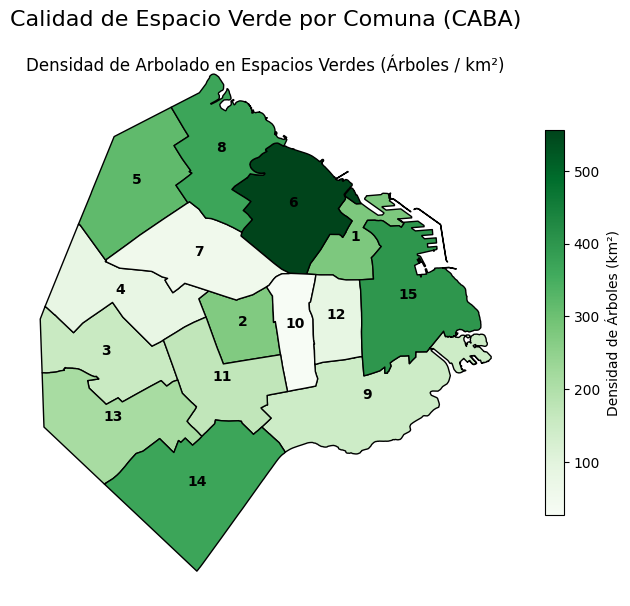

In [ ]:

COLUMNA_ID_COMUNA = 'COMUNA_ID'
comunas_gdf[COLUMNA_ID_COMUNA] = comunas_gdf.index.astype(int) + 1
print(f"Comunas creadas para el análisis: {list(comunas_gdf[COLUMNA_ID_COMUNA].unique())}")

comunas_gdf = comunas_gdf.set_crs('EPSG:4326')

# Convertir el DataFrame de árboles a GeoDataFrame
geometry = [Point(xy) for xy in zip(arboles["long"], arboles["lat"])]
arboles_gdf = gpd.GeoDataFrame(arboles, geometry=geometry, crs='EPSG:4326')

# Definir un CRS Métrico para Argentina (para calcular área)
metric_crs = 'EPSG:5347'

# Proyectar ambos GeoDataFrames al CRS métrico
print("Proyectando CRS a EPSG:5347 para cálculos métricos...")
comunas_gdf_metric = comunas_gdf.to_crs(metric_crs)
arboles_gdf_metric = arboles_gdf.to_crs(metric_crs)

# Calcular el área (en km²)
comunas_gdf_metric['area_km2'] = comunas_gdf_metric.geometry.area / 1_000_000

# Unión Espacial
arboles_en_comuna = gpd.sjoin(
    arboles_gdf_metric,
    comunas_gdf_metric,
    how='inner',
    predicate='within'
)

conteo_por_comuna = arboles_en_comuna.groupby(COLUMNA_ID_COMUNA).size().reset_index(name='Cantidad_Arboles')

# Fusionar el conteo y el área en el GeoDataFrame de comunas
comunas_final = comunas_gdf_metric.merge(conteo_por_comuna, on=COLUMNA_ID_COMUNA, how='left')
comunas_final['Cantidad_Arboles'] = comunas_final['Cantidad_Arboles'].fillna(0)

# Calcular la variable de CALIDAD: Densidad de Árboles por km²
comunas_final['densidad_arboles_km2'] = comunas_final['Cantidad_Arboles'] / comunas_final['area_km2']

print("\n Cálculo de Densidad de Árboles por Comuna (Árboles/km²):")
print(comunas_final[[COLUMNA_ID_COMUNA, 'area_km2', 'Cantidad_Arboles', 'densidad_arboles_km2']].sort_values(by='densidad_arboles_km2', ascending=False))

# Grafico
fig, ax = plt.subplots(1, 1, figsize=(8, 10))
comunas_final.plot(
    column='densidad_arboles_km2',
    ax=ax,
    legend=True,
    cmap='Greens',
    edgecolor='black',
    legend_kwds={
        'label': "Densidad de Árboles (km²)",
        'orientation': "vertical",
        'shrink': 0.5,
        'pad': 0.05,
    }
)

for idx, row in comunas_final.iterrows():
    ax.annotate(text=row[COLUMNA_ID_COMUNA],
                xy=row.geometry.centroid.coords[0],
                ha='center',
                color='black',
                fontsize=10,
                fontweight='bold')

ax.set_title('Calidad de Espacio Verde por Comuna (CABA)', fontsize=16)
ax.text(0.5, 0.96,
        'Densidad de Arbolado en Espacios Verdes (Árboles / km²)',
        fontsize=12,
        ha='center',
        transform=ax.transAxes)
ax.set_axis_off()

# Guardar la imagen en un archivo
plt.savefig("mapa_densidad_arboles_comunas.png", dpi=300, bbox_inches='tight')
print("\n Mapa guardado como 'mapa_densidad_arboles_comunas.png'")

# Ejercicio 3
1. Escriba un código para replicar la figura 2.
--
2. Escriba un comando para guardar la imagen en formato pdf, luego guardela como un png con 150 dpi de resolución, abra ambos archivos y vea que sucede al hacer zoom. ¿Notás alguna diferencia? Explicá a que se debe si es que vio la diferencia.
--
**Al hacer zoom en pdf no pierde calidad, en cambio en la imagen png pierde un poco de nitidez.**
3. Extra: Busque por qué la línea que une neptuno con mercurio pasa por todos los planetas.
--
**La línea es recta porque representa una ley física universal linealizada por la escala logarítmica, y pasa por todos los planetas porque todos los planetas  están ordenados secuencialmente en el array asignado.**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

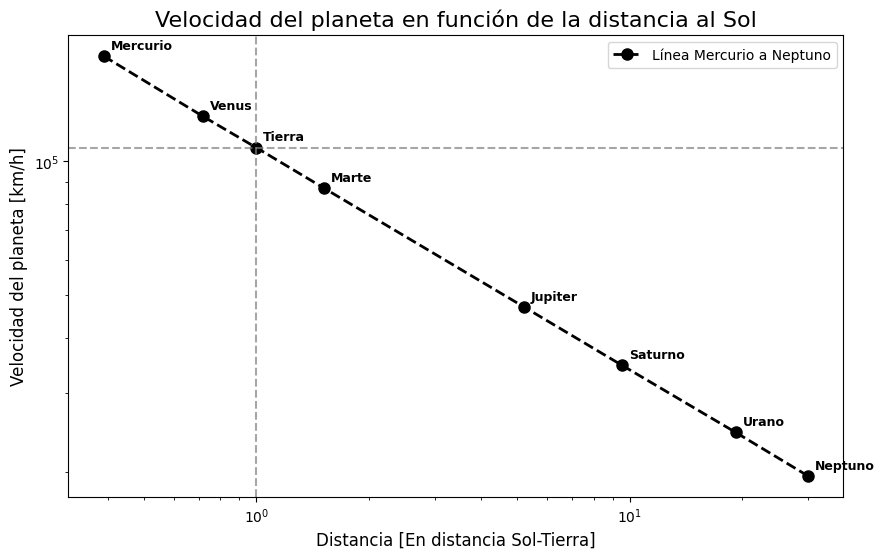

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np

planetas = np.array(["Mercurio", "Venus", "Tierra", "Marte", "Jupiter","Saturno", "Urano", "Neptuno"])
distancias = np.array([0.39, 0.72, 1.00, 1.52, 5.20, 9.54, 19.22, 30.06]) # Distancias Sol-Tierra (UA)
velocidad = np.array([172404, 126108, 107244, 86868, 47016, 34705, 24516, 19548]) # Velocidad en km/h

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(distancias, velocidad, marker='o', linestyle='--',
        color='black', linewidth=2, markersize=8,
        label='Línea Mercurio a Neptuno')

ax.set_xscale('log')
ax.set_yscale('log')

indice_tierra = np.where(planetas == 'Tierra')[0][0]
distancia_tierra = distancias[indice_tierra]
velocidad_tierra = velocidad[indice_tierra]

ax.axvline(distancia_tierra, color='grey', linestyle='--', linewidth=1.5, alpha=0.7)
ax.axhline(velocidad_tierra, color='grey', linestyle='--', linewidth=1.5, alpha=0.7)

ax.set_title('Velocidad del planeta en función de la distancia al Sol', fontsize=16)
ax.set_xlabel('Distancia [En distancia Sol-Tierra]', fontsize=12)
ax.set_ylabel('Velocidad del planeta [km/h]', fontsize=12)
ax.legend(loc='upper right')

for i, txt in enumerate(planetas):
    ax.annotate(txt,
                (distancias[i], velocidad[i]),
                textcoords="offset points",
                xytext=(5, 5),
                ha='left',
                fontsize=9,
                fontweight='bold')
# PDF
plt.savefig('planetas_log_log_vectorial_final_dentro.pdf', bbox_inches='tight')
# Descarga
files.download('planetas_log_log_vectorial_final_dentro.pdf')
# PNG
plt.savefig('planetas_log_log_150dpi_final_dentro.png', dpi=150, bbox_inches='tight')
# Descarga
files.download('planetas_log_log_150dpi_final_dentro.png')

plt.show()